*In each section, we try to answer some questions about the data-set*

# 1. Data Wrangling


*   What is the source of data?

>> https://www.cdc.gov/nchs/nhanes/index.htm

>> Demographic data-https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics&CycleBeginYear=2017
*Note- Variable lists are defined in detail in the urls mentioned*

>> Blood Pressure data- https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Examination&CycleBeginYear=2017

>> Ferritin data- 

*   How was the data collected?

>> SAS files are downloaded and pandas.read_sas is used for reading those.

*   What is the structure of the raw data?

>> The raw data download is in .XPT format (SAS)
 
*   Do we need to parse it?

>> Not for now. The data is structured and tabular

*   Do we need to transform it into some other readily usable format?

>> I dont think it is necessary as the data can be loaded directly into a pandas dataframe. And from this dataframes, we can seperate the required columns






In [2]:
#Import necessary libraries
import csv
import numpy as np
import pandas as pd
import missingno as mn
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
#Load & Extract
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
df_demographic=pd.read_sas("/content/drive/MyDrive/HealthiestApp/DEMO_I.XPT")
df_demographic.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,83732.0,9.0,2.0,1.0,62.0,NaN,3.0,3.0,1.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,5.0,1.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,5.397605e-79,5.397605e-79,1.000000e+00,1.0,62.0,1.0,5.0,1.0,3.0,134671.370419,135629.507405,1.0,125.0,10.0,10.0,4.39
1,83733.0,9.0,2.0,1.0,53.0,NaN,3.0,3.0,1.0,NaN,2.0,NaN,2.0,2.0,7.0,NaN,3.0,3.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,5.397605e-79,1.0,53.0,2.0,3.0,3.0,NaN,24328.560239,25282.425927,1.0,125.0,4.0,4.0,1.32
2,83734.0,9.0,2.0,1.0,78.0,NaN,3.0,3.0,2.0,NaN,1.0,2.0,1.0,1.0,NaN,NaN,3.0,1.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2.0,2.0,5.397605e-79,5.397605e-79,2.000000e+00,2.0,79.0,1.0,3.0,1.0,3.0,12400.008522,12575.838818,1.0,131.0,5.0,5.0,1.51
3,83735.0,9.0,2.0,2.0,56.0,NaN,3.0,3.0,2.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,5.0,6.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,56.0,1.0,5.0,6.0,NaN,102717.995647,102078.634508,1.0,131.0,10.0,10.0,5.00
4,83736.0,9.0,2.0,2.0,42.0,NaN,4.0,4.0,2.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,4.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,5.397605e-79,2.000000e+00,5.397605e-79,2.0,42.0,1.0,4.0,3.0,NaN,17627.674984,18234.736219,2.0,126.0,7.0,7.0,1.23


# 2. Data Understanding & Exploration


*   What challenges do we foresee with using this data? Perhaps the data might not have enough information about each sample. Maybe there is too much information. Write our presumptions.

>> Different datasets are available for different health risks One data file can be linked to the other NHANES data files using the unique survey participant identifier (i.e., SEQN- A column in every datafile). But the problem is that number of common participants can be highly variable.

>> SEQN between demographic and risk data are different, should find a way to compare them. **bold text**

---

*   How is the data quality in terms of missing values and cleaning required?

>> Yes, cleaning is required. In some columns null values are present and in some the variables are assigned a number if the value is null or the value is not useful. Thus, The cleaning depends on the columns you choose.

---


*   How do we plan to deal with missing values (ignore or impute)?


>> There are multiple columns for determining a single state. So even if a participant doesn't answer one question, there can be chance that he answers another. If values in all considered columns are null we can ignore it as we can't do anything with it.


---


*   What are the most common categorical values? What are the limits for continuous data? Are there outliers? What relationships do we find in the data?
*   Is there an example of an outlier in the data that surprised us? Why?
*   Look at some of the histograms for the data. Any observations on the distributions?
*   Is there a relationship between two columns of the data that is unexpected? How would we explain it?
*   Any other interesting data visualizations that reveal some patterns?
*   What tool has been more useful in understanding the data? Quantifying and summarizing data with Pandas or visualizing your data with plotting tools?

>> So far pandas was enough 
















In [6]:
# Data summary
print(df_demographic.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9971 non-null   float64
 1   SDDSRVYR  9971 non-null   float64
 2   RIDSTATR  9971 non-null   float64
 3   RIAGENDR  9971 non-null   float64
 4   RIDAGEYR  9971 non-null   float64
 5   RIDAGEMN  695 non-null    float64
 6   RIDRETH1  9971 non-null   float64
 7   RIDRETH3  9971 non-null   float64
 8   RIDEXMON  9544 non-null   float64
 9   RIDEXAGM  4060 non-null   float64
 10  DMQMILIZ  6149 non-null   float64
 11  DMQADFC   527 non-null    float64
 12  DMDBORN4  9971 non-null   float64
 13  DMDCITZN  9969 non-null   float64
 14  DMDYRSUS  2236 non-null   float64
 15  DMDEDUC3  2647 non-null   float64
 16  DMDEDUC2  5719 non-null   float64
 17  DMDMARTL  5719 non-null   float64
 18  RIDEXPRG  1288 non-null   float64
 19  SIALANG   9971 non-null   float64
 20  SIAPROXY  9970 non-null   floa

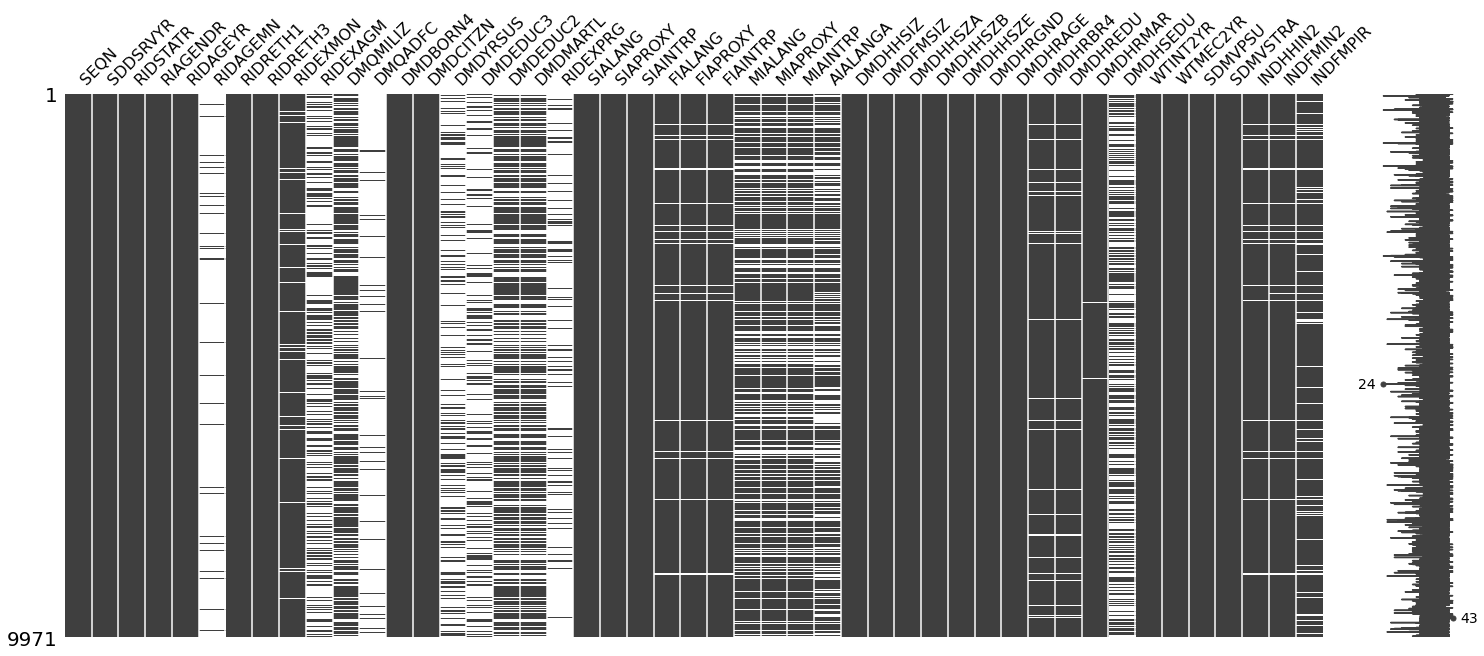

In [7]:
# Visualizing missing values
mn.matrix(df_demographic)

In [ ]:
# Missing values
df_demographic.isna().mean() * 100

SEQN         0.000000
SDDSRVYR     0.000000
RIDSTATR     0.000000
RIAGENDR     0.000000
RIDAGEYR     0.000000
RIDAGEMN    93.548736
RIDRETH1     0.000000
RIDRETH3     0.000000
RIDEXMON     5.943376
RIDEXAGM    62.902529
DMQMILIZ    35.119948
DMQADFC     93.937757
DMDBORN4     0.000000
DMDCITZN     0.032418
DMDYRSUS    78.949643
DMDEDUC3    75.081046
DMDEDUC2    39.820618
DMDMARTL    39.820618
RIDEXPRG    88.005187
SIALANG      0.000000
SIAPROXY     0.000000
SIAINTRP     0.000000
FIALANG      5.122109
FIAPROXY     5.122109
FIAINTRP     5.122109
MIALANG     27.771774
MIAPROXY    27.771774
MIAINTRP    27.771774
AIALANGA    46.217852
DMDHHSIZ     0.000000
DMDFMSIZ     0.000000
DMDHHSZA     0.000000
DMDHHSZB     0.000000
DMDHHSZE     0.000000
DMDHRGND     0.000000
DMDHRAGZ     0.000000
DMDHREDZ     5.295008
DMDHRMAZ     2.063972
DMDHSEDZ    48.660039
WTINT2YR     0.000000
WTMEC2YR     0.000000
SDMVPSU      0.000000
SDMVSTRA     0.000000
INDHHIN2     5.305814
INDFMIN2     5.122109
INDFMPIR  

In [8]:
df_fertin=pd.read_sas("/content/drive/MyDrive/HealthiestApp/FERTIN_J.XPT")
df_fertin.head()

,SEQN,LBXFER,LBDFERSI
0,93703.0,NaN,NaN
1,93704.0,36.6,36.6
2,93705.0,28.7,28.7
3,93706.0,284.0,284.0
4,93707.0,49.3,49.3


In [9]:
df_bloodpressure=pd.read_sas("/content/drive/MyDrive/HealthiestApp/BPX_J.XPT")
df_bloodpressure.head()

,SEQN,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4
0,93703.0,NaN,120.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,114.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,NaN,NaN,1.0,4.0,52.0,1.0,1.0,220.0,NaN,NaN,NaN,NaN,NaN,NaN,202.0,62.0,2.0,198.0,74.0,2.0
3,93706.0,NaN,NaN,1.0,3.0,82.0,1.0,1.0,140.0,112.0,74.0,2.0,114.0,70.0,2.0,108.0,76.0,2.0,NaN,NaN,NaN
4,93707.0,NaN,NaN,1.0,2.0,100.0,1.0,1.0,140.0,128.0,38.0,2.0,128.0,46.0,2.0,128.0,58.0,2.0,NaN,NaN,NaN


In [10]:
print(df_demographic.shape)
print(df_fertin.shape)
print(df_bloodpressure.shape)

(9971, 47)
(7332, 3)
(8704, 21)


In [ ]:
now=list(df_demographic["SEQN"])
nowf=list(df_fertin["SEQN"])
tempf=[]
for i in nowf:
  if(i in now):
    tempf.append(i)
print(len(tempf))


0


In [ ]:
now=list(df_demographic["SEQN"])
nowb=list(df_bloodpressure["SEQN"])
tempb=[]
for i in nowb:
  if (i in now):
    tempb.append(i)
print(len(tempb))


0


In [ ]:
Counter(df_bloodpressure["SEQN"])

Counter({93703.0: 1,
         93704.0: 1,
         93705.0: 1,
         93706.0: 1,
         93707.0: 1,
         93708.0: 1,
         93709.0: 1,
         93710.0: 1,
         93711.0: 1,
         93712.0: 1,
         93713.0: 1,
         93714.0: 1,
         93715.0: 1,
         93716.0: 1,
         93717.0: 1,
         93718.0: 1,
         93719.0: 1,
         93720.0: 1,
         93721.0: 1,
         93722.0: 1,
         93723.0: 1,
         93724.0: 1,
         93725.0: 1,
         93726.0: 1,
         93727.0: 1,
         93728.0: 1,
         93729.0: 1,
         93730.0: 1,
         93731.0: 1,
         93732.0: 1,
         93733.0: 1,
         93735.0: 1,
         93736.0: 1,
         93737.0: 1,
         93738.0: 1,
         93739.0: 1,
         93740.0: 1,
         93741.0: 1,
         93742.0: 1,
         93743.0: 1,
         93744.0: 1,
         93745.0: 1,
         93746.0: 1,
         93747.0: 1,
         93748.0: 1,
         93749.0: 1,
         93751.0: 1,
         9375

In [ ]:
print(min(now))
print(max(nowf))
print(max(nowf))

83732.0
102956.0
102956.0


In [ ]:
nowf=list(df_fertin["SEQN"])
nowb=list(df_bloodpressure["SEQN"])
tempfb=[]
for i in nowb:
  if (i in nowb):
    tempfb.append(i)
print(len(tempfb))
print(len(df_bloodpressure))
print(len(df_fertin))


8704
8704
7332


In [ ]:
# Data Cleaning

In [ ]:
# Data Exploration

# 3. Data Modeling & Evaluation


*   What is our goal in this modeling exercise? What are we trying to discover?
*   Do we need any feature engineering?
*   What are the different modeling techniques or machine learning algorithms that can help us reach our goals?
*   What will be the criteria for selecting our final algorithm?
*   What are the assumptions of our model?
*   How will we evaluate the performance of the algorithm?





# 4. Conclusion



*   What is the conclusion of this data mining exercise?
*   Did our data mining yield results we had thought of before analyzing the data?
If so, how did the analyses strengthen our conclusion?
If not, what did we discover?
*   What was the most important part of the analysis?

